### 문제
- 소 N마리를 운동시키는데 드는 최소 시간을 출력
- 소는 올라갈때와 내려갈 때 각각 최대 1명의 조련사에게 도움을 받아 내려가거나 올라갈 수 있다.
- 소를 하산시킬때 올라가 있던 소중 아무거나 골라도 된다(올려보낸 순서가 아니여도 된다)
- 대충 시각화하면 이런느낌
  - 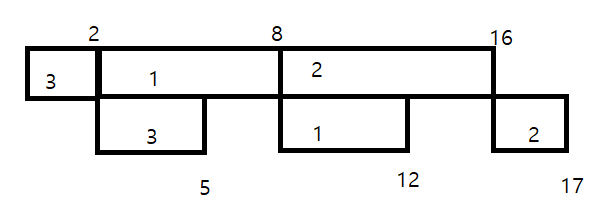
  - 네모 안은 소 번호, 바깥쪽 숫자는 시각

### 접근
- 가장 먼저 보이는 것은 올려다보내는 시간과 내려보내는 시간의 차이를 최대한 줄이는 것에 있다고 본다.
  - 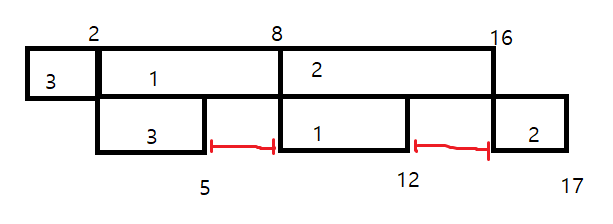
  - 즉 빨간색의 길이를 최대한 줄이는 것이다.
- 처음소를 올릴때와 마지막 소를 내릴때의 차이도 줄이는게 좋을 것이다.
  - 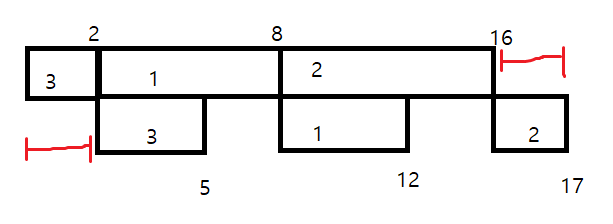
- 뭔가 이것저것 해봐야 할 것 같다.
  - naive하게 모든 순열조합을 시도하면서 등하산을 빨리시키는 수치를 찾아보는 것으로

In [ ]:
from heapq import heappush, heappop
import itertools
import io, os
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

L = []
for _ in range(int(input())) :
  L.append(tuple(map(int, input().split())))

ans = 9999999999
for w in itertools.permutations(L) :
  l = [*w]
  peak = [] #산 꼭대기에 올라간 소들의 하산 시간?
  U, D = l.pop()
  res = U #첫번째 소의 등산시간
  left = D #하산작업의 남은 시간
  while l :
    U, D = l.pop()
    if left >= U : #남은 하산시간이 등산시간보다 길면
      left -= U #남은 하산시간은 등산시간만큼 빠진다.
      res += U
      heappush(peak, D) #해당 소는 산 꼭대기에 올라간다
    else : #등산시간이 더 길면(left <= U)
      res += left #남은 하산시간만큼 등산시간을 더한다.
      u_left = U - left #남은 등산시간
      left = 0
      while u_left and peak: #남는 등산시간동안 가능한한 많은 소를 하산시킨다
        if left == 0 :
          left = heappop(peak) #하산시간이 가장 짧은 소가 다음 하산을 시작한다.
        if left <= u_left : #등산이 여전히 더 긴경우
          u_left -= left
          res += left
          left = 0
        else :
          left -= u_left
          res += u_left
          u_left = 0
          heappush(peak, D)

      if u_left : #마저 등산시킨다
        heappush(peak, D)
        res += u_left
        u_left = 0

    # print(res)
  #모든 소가 등반한 상태
  res += left + sum(peak)
  if res <= ans :
    print(w)
    ans = res

debug(ans)

멘탈을 채우고 다시도전해보자..